#### Author Name: Kazi Anisuzzaman
#### Dataset: Synthetic Financial Datasets For Fraud Detection [Link](https://www.kaggle.com/datasets/ealaxi/paysim1)

In [ ]:
from google.colab import drive
drive.mount ("/content/gdrive")

%cd /content/gdrive/MyDrive/Kaggle/Final_Project_Model_Runs _5610
!ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/Kaggle/Final_Project_Model_Runs _5610
paysim1.zip  PS_20174392719_1491204439457_log.csv


In [ ]:
!nvidia-smi

Mon Apr 24 21:15:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

In [ ]:
# !kaggle datasets download -d ealaxi/paysim1

In [ ]:
# !unzip paysim1.zip

Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import numpy as np




In [ ]:
data= pd.read_csv("/content/gdrive/MyDrive/Kaggle/Final_Project_Model_Runs _5610/PS_20174392719_1491204439457_log.csv")


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data = data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
data = pd.get_dummies(data)

data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


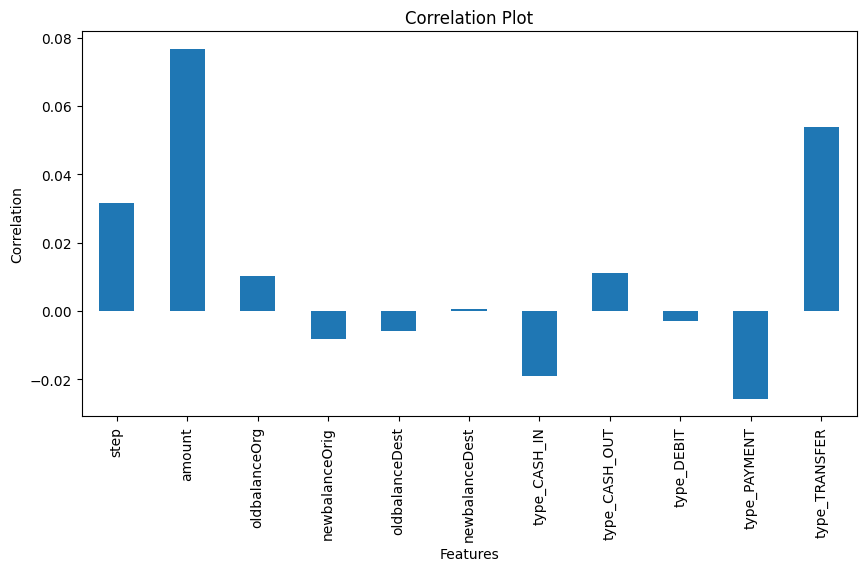

In [ ]:
# Calculate the correlation between the features
corr = data.corr()['isFraud']
corr = corr.drop(['isFraud'])

# Create a bar plot of the correlation values
corr.plot.bar(figsize=(10, 5))
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation Plot')
plt.show()



In [ ]:

Total_transactions = len(data)
normal = len(data[data.isFraud == 0])
fraudulent = len(data[data.isFraud == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Trnsactions are',Total_transactions)
print('Number of Normal Transactions are',normal)
print('Number of fraudulent Transactions are',fraudulent)
print('Percentage of fraud Transactions is', fraud_percentage)

Total number of Trnsactions are 6362620
Number of Normal Transactions are 6354407
Number of fraudulent Transactions are 8213
Percentage of fraud Transactions is 0.13


In [ ]:
X = data.drop(['isFraud'], axis = 1).values
y = data['isFraud'].values

In [ ]:
X
y

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

### Decision Tree Model Evaluation


In [ ]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

In [ ]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9994561988614753


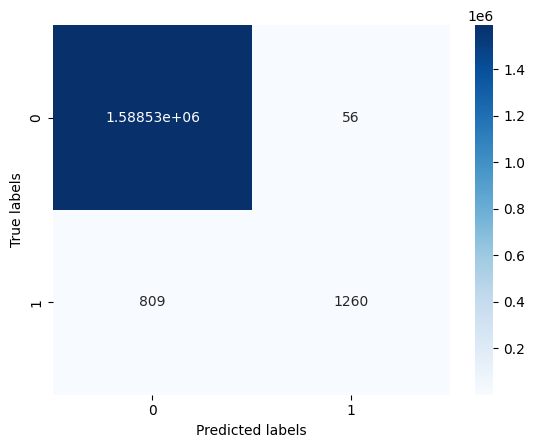

In [ ]:
cm = confusion_matrix(y_test, dt_yhat, labels = [0, 1])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))

F1 score of the Decision Tree model is 0.7444608567208272


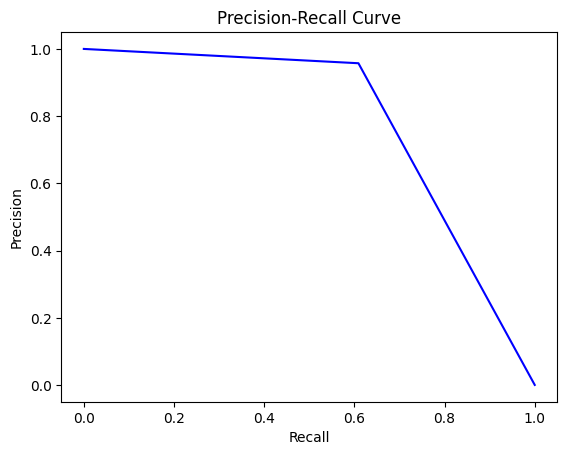

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, dt_yhat)

plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

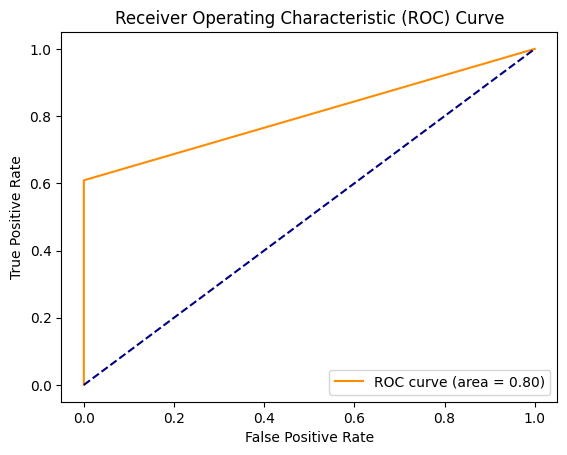

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, dt_yhat)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### KNN Model Evaluation  

In [ ]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [ ]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.9994279086288352


In [ ]:
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))


F1 score of the K-Nearest Neighbors model is 0.7515019115237574


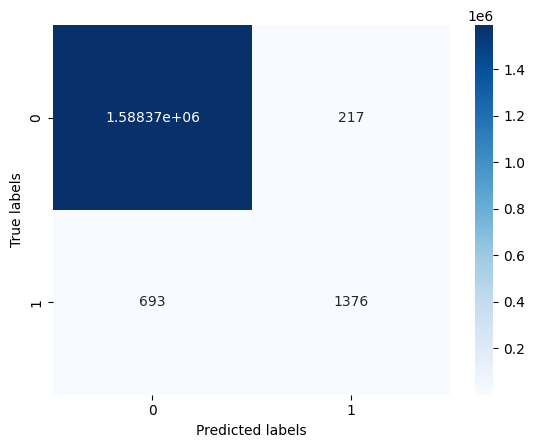

In [ ]:
knn_cm = confusion_matrix(y_test, knn_yhat, labels = [0, 1])
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

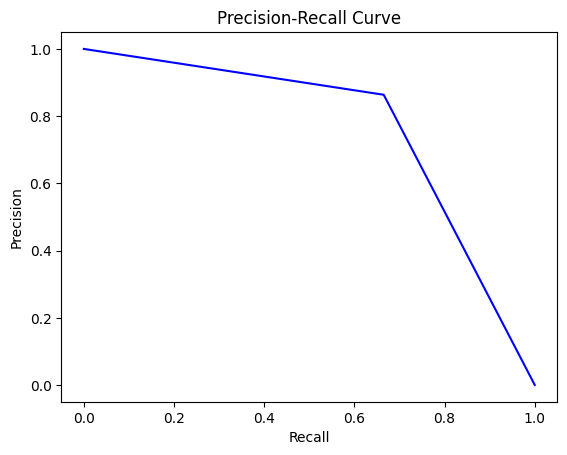

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, knn_yhat)

plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

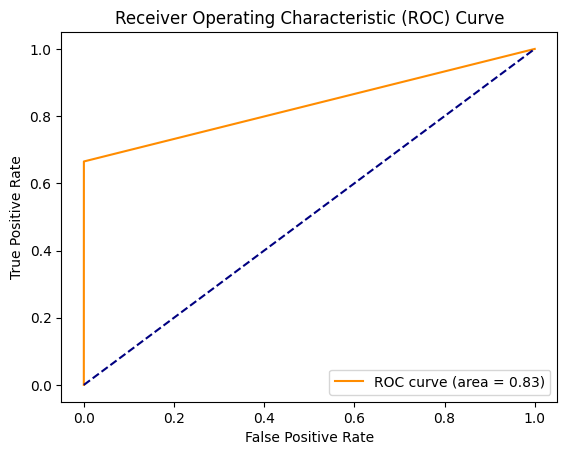

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, knn_yhat)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Model Evaluation

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [ ]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9982233733902072


In [ ]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.3767093074547861


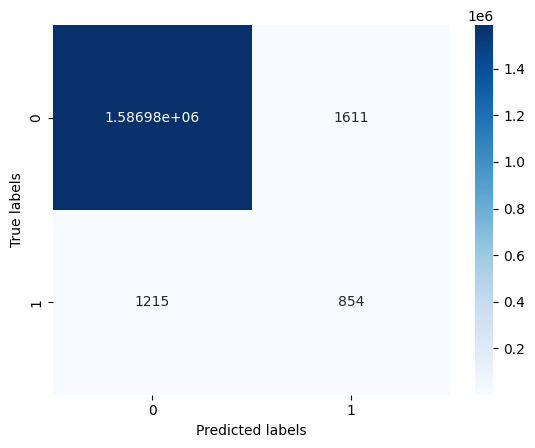

In [ ]:
lr_cm = confusion_matrix(y_test, lr_yhat, labels = [0, 1])
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

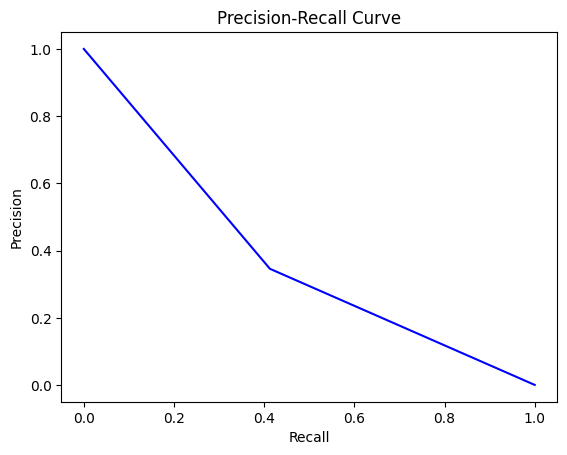

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, lr_yhat)

plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

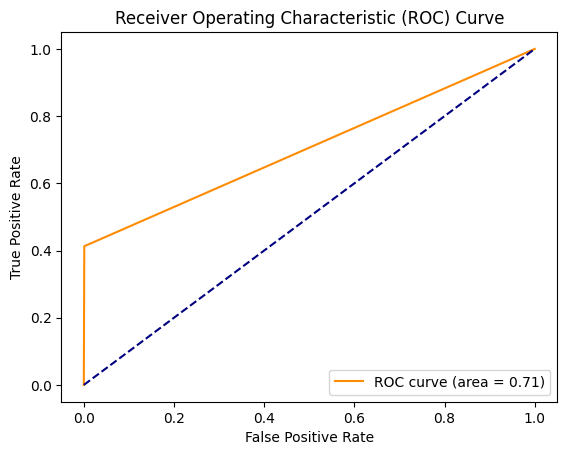

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lr_yhat)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Support Vector Machines Model Evaluation

In [ ]:
svm = svm.SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [ ]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))

In [ ]:
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))

In [ ]:
svm_cm = confusion_matrix(y_test, svm_yhat, labels = [0, 1])
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, svm_yhat)

plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, svm_yhat)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest Modle Evaluation

In [ ]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [ ]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9990657936510431


In [ ]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

F1 score of the Random Forest model is 0.347444089456869


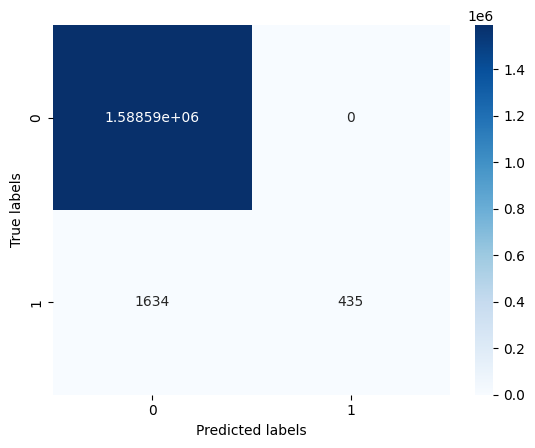

In [ ]:
rf_cm = confusion_matrix(y_test, rf_yhat, labels = [0, 1])
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

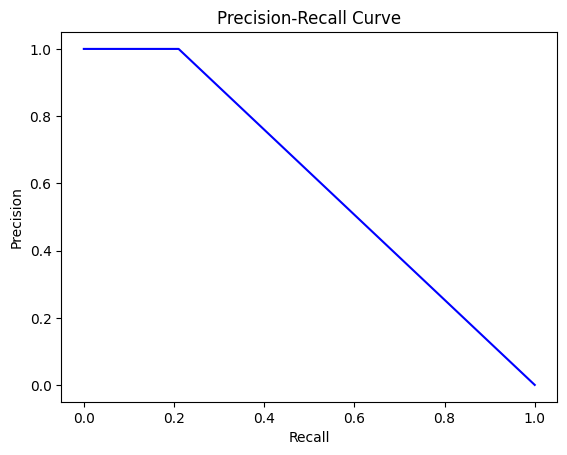

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, rf_yhat)

plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

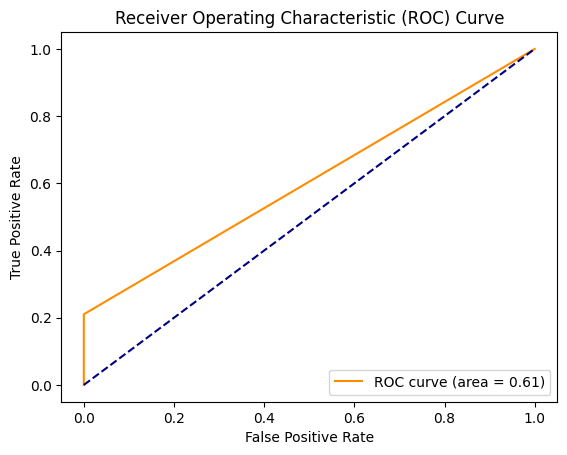

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rf_yhat)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()